# Data Preprocessing Tools

Three steps that should be done when preprocessing the data: missing data, categorical data transformation, and feature scaler

* always do feature selection after the train test split
* please don't do feature selection on categorical data (a.k.a one-hot-encoding values)
* MinMaxScaler when most of the data are normal distributed; StandScaler when almost all kinds of data

## Taking care of missing data

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [0]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding categorical data

### Encoding the Independent Variable

In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# the transformers argument should be in a list and consist of tuple, 'encoder is needed', the second one is the encoder you're using
# the third one is the index in the X that you want to transform
# the remainder is what you're going to do to the rest column, can choose from 'drop', 'passthrough'
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [0]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Encoding the Dependent Variable

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [0]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


## Splitting the dataset into the Training set and Test set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [0]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [0]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [0]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [0]:
print(y_test)

[0 1]


## Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [0]:
print(X_train)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


In [0]:
print(X_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]


## Multi Linear Regression
* the linear_model with help you to solve the dummy variable trap(which is that if you don't drop the first column when using one hot encoder, the last dummy variable will be colineary to other variables)
* you also don't need to do the backward elimination for the model cuz it is also built in the model

In [ ]:
regressor = LinearRegression()
# print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))
# print(regressor.coef_)
# print(regressor.intercept_)

## Polynomial Linear Regression
* if you only have single X independent variable, you need to reshape the array to vertical shape of vector (x,1), otherwise the machine learning classes won't take it; y, on the other hand, won't need to be reshaped.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# degree =2 means the biggest power is 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
linear = LinearRegression()
linear.fit(X_poly, y_train)

## Support Vector Regression
* feature scaling needed: when an algorithm has implicit function to the dependent variable, then you should adopt feature scaling, when it's a linear regression model with coefficients to compensate the difference of scale, then you can leave it. You don't want the independent variables with smaller scale to be neglected in the implicit function.
* if you also need to scale Y, you should use a different standard scaler, because a standard scaler is to use the mean and std to transform it, you couldn't use the same scaler for X & y.
* make sure to reshape y into a vertical vector (x,1) in order to fit into the StandardScaler, the same reason as the machine learning classes, that they aren't able to take horizontal vector (1,x) when fitting the data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y=StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

## Decision Tree and Random Forest
* you don't need to apply feature scaling to decision tree and random forest, because it is split by successive leafs
* it is a better predictor for non-single variable datas

In [ ]:
# visualizing

# method1
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# method2
import seaborn as sns
%matplotlib inline

p, ax = plt.subplots()
ax.scatter(X, y, color='r')
ax.plot(X_grid, regressor.predict(X_grid), color = 'blue')
ax.set_title('Truth or Bluff (Decision Tree Regression)')
ax.set_xlabel('Position level')
ax.set_ylabel('Salary')

# method3
sns.scatterplot(x=X, y=y, color='red')
sns.lineplot(x=df_draw['X'], y=df_draw['y'], color='b')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')

## Regression Model Selection
* or use adjusted r-square: because r-square can only be better, as if the model knows that adding a new variable will decrease the r-square, it will simply allocate a 0 coefficient to that new variable. That's why adjusted r-square was invented, to punish too many variables in a regression model

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

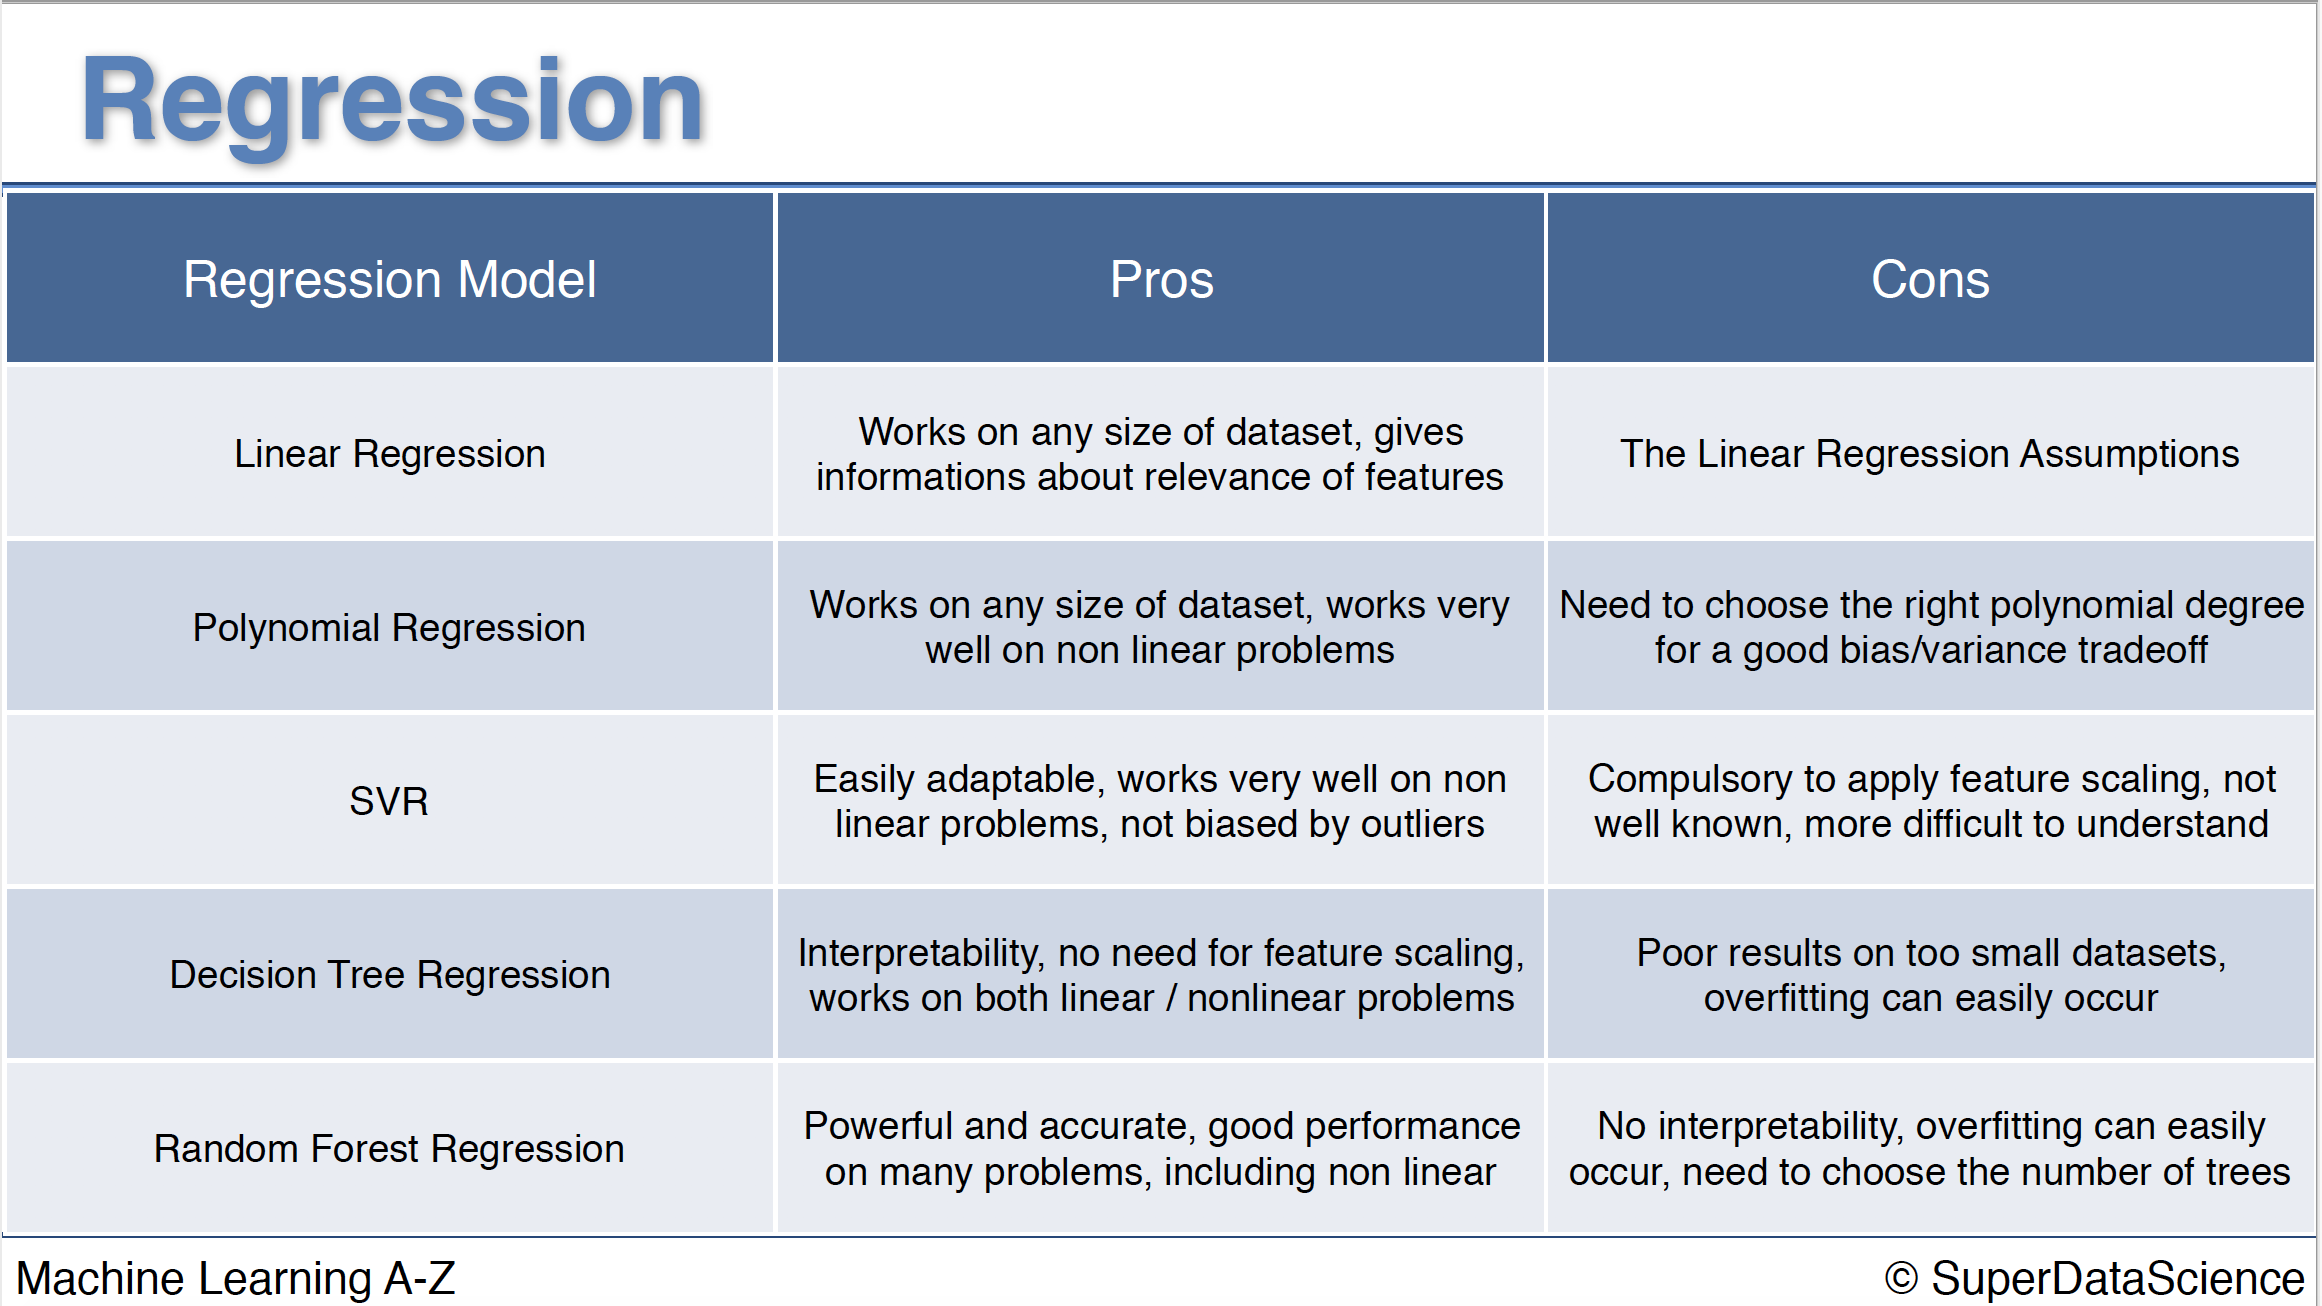

In [4]:
from PIL import Image

Image.open('Regression_comparison.png')

### Problem of overfitting
* you can use regularization to solve the problem 

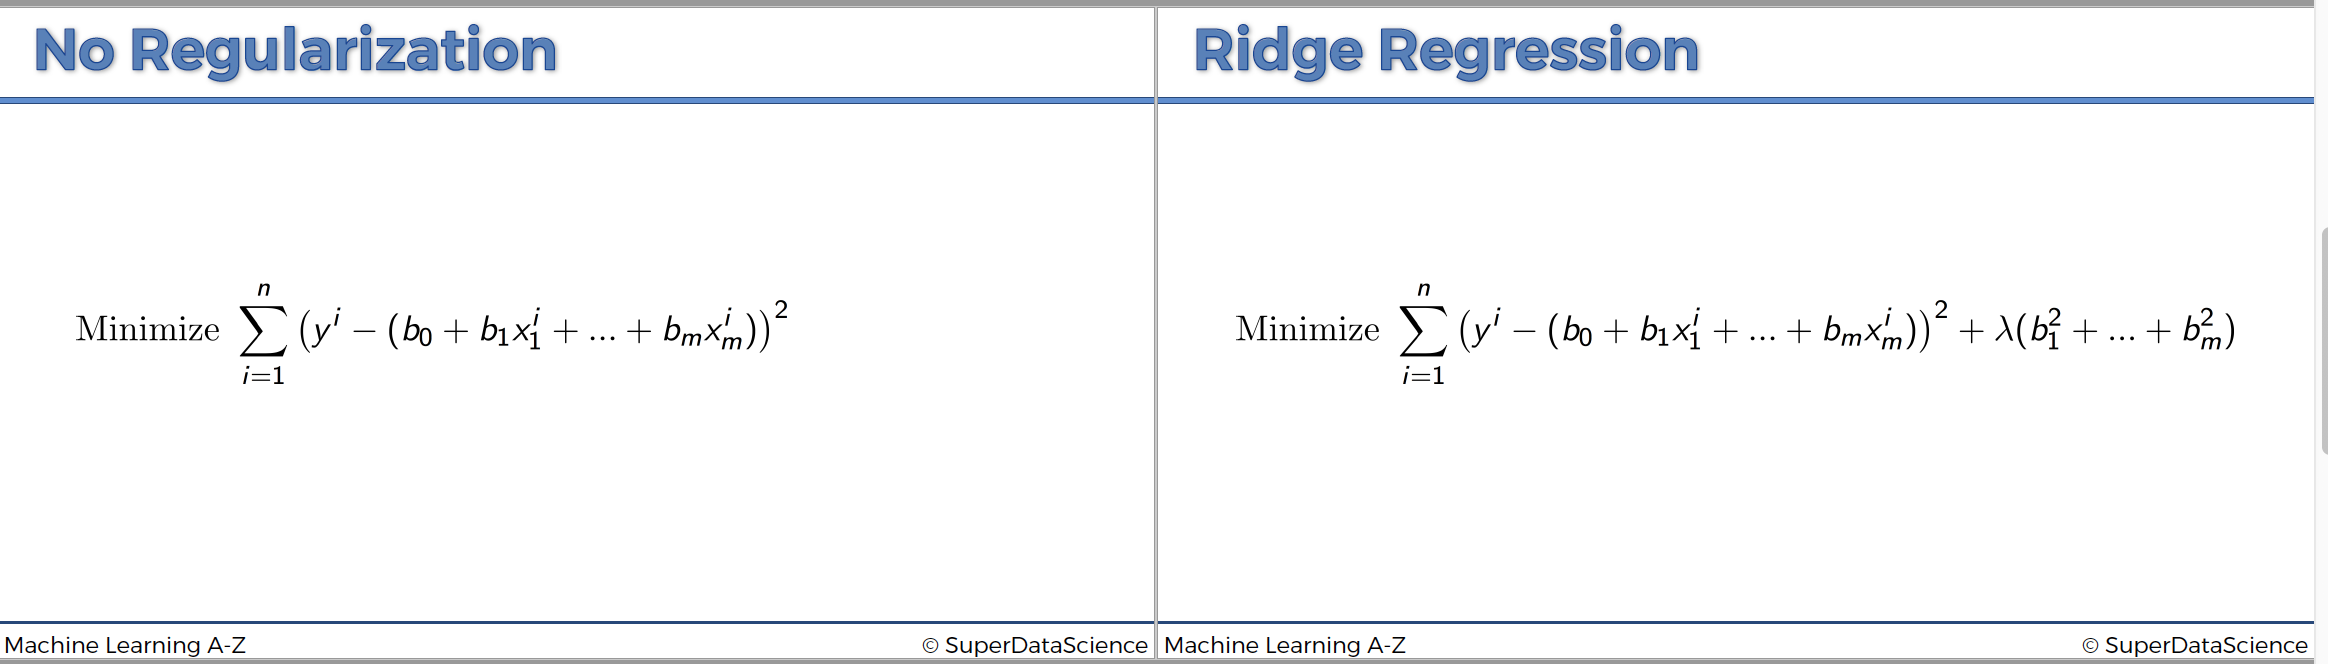

In [7]:
Image.open('No_reg.png')

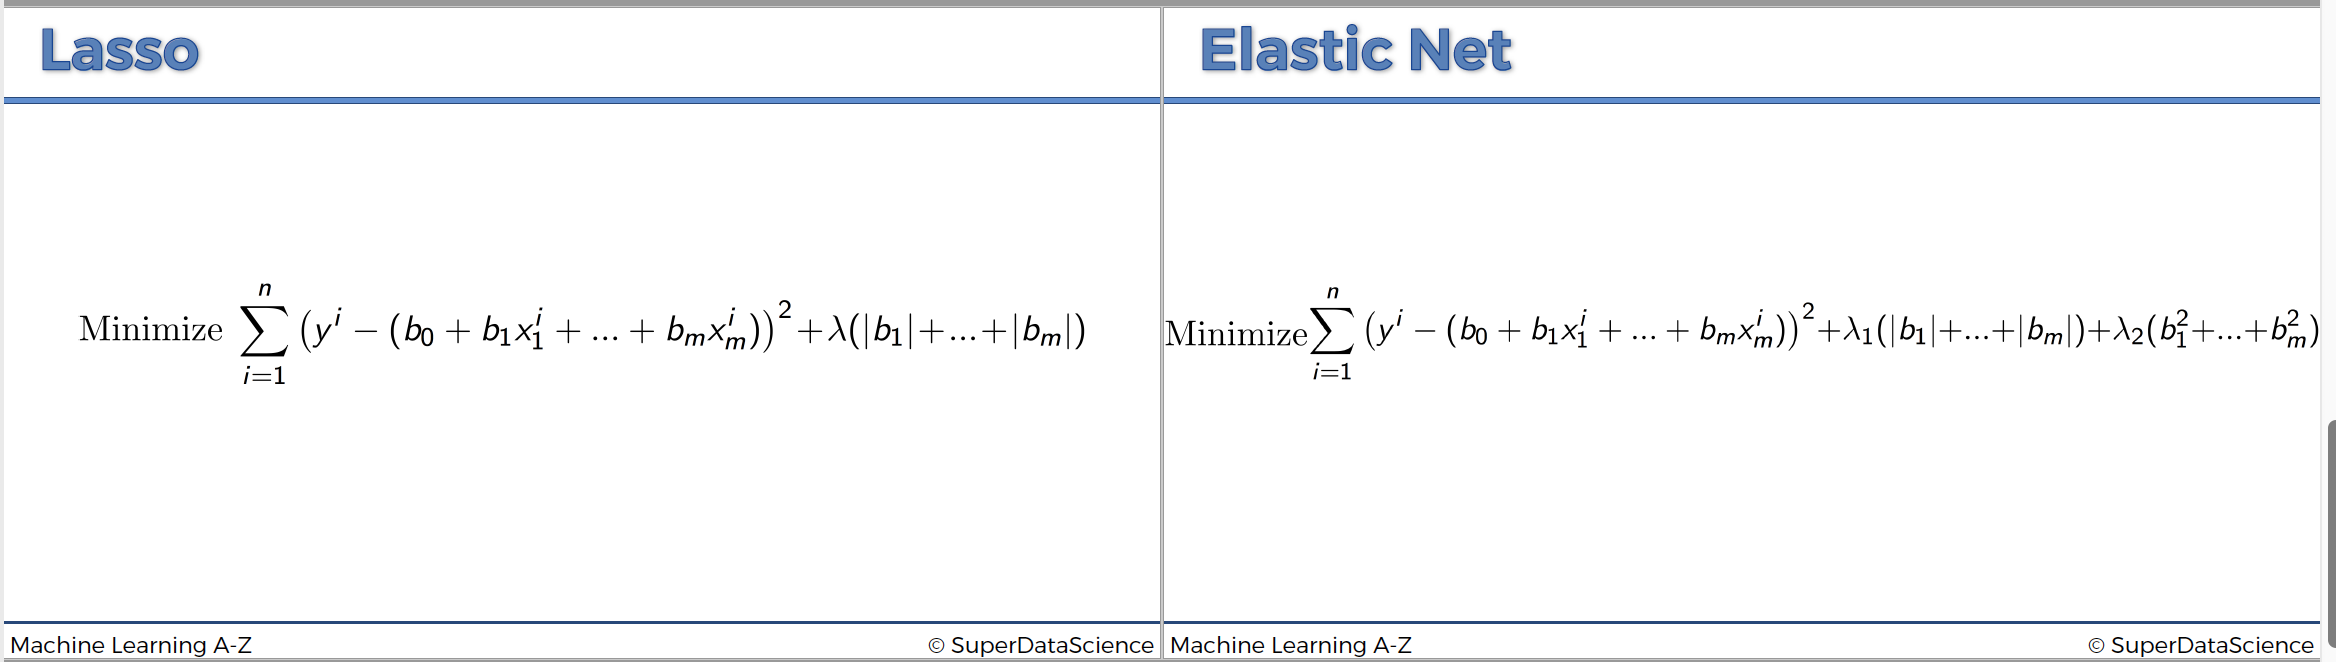

In [6]:
Image.open('Lasso_elastic.png')

## Logistic Regression
* feature scaling is not needed. But you can always adopt feature scaling to slightly improve the accuracy.

## K-Nearest Neighbors
* It is a non-linear classification model

## Supported Vector Machine
* it is a line and you'll find the distances of two points to the line you choose. Try to maximize the margin (distance) in order to get the best line to separate the dataset. The algorithm is that even if you get rid of the other points, you can still find this line with the two points.
* kernel SVM - non-linear SVM model.

In [ ]:
from sklearn.svm import SVC
# you create a linear classifier
svc = SVC(kernal='linear', random_state=0)


## Decision Tree and Random Forest 